In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing data
df_info = pd.read_csv('data/lending_club_info.csv',index_col='LoanStatNew')
df = pd.read_csv('data/lending_club_loan_two.csv')

In [4]:
# Info dataframe, used to easily get access to the information in the df 
df_info.head()

Description
LoanStatNew                                                   
loan_amnt    The listed amount of the loan applied for by t...
term         The number of payments on the loan. Values are...
int_rate                             Interest Rate on the loan
installment  The monthly payment owed by the borrower if th...
grade                                   LC assigned loan grade

In [5]:
# Generating a quick little function to print the description of a column in the info dataframe
def feat_info(column_name):
    print (df_info.loc[column_name]['Description'])

In [6]:
feat_info('loan_status')

Current status of the loan


In [7]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                           address  
0     0174 Michelle Gateway\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113  
3            823 Reid Ford\nDelacruzside, MA 00813  
4             679 Luna Roads\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

We can see that we have both stings and integers as our feature variables, will likely need to investigate how to best utilise these in pre-processing. Also have some features which are missing data e.g. emp_title, emp_length, title etc. Will need to do something about these as well 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

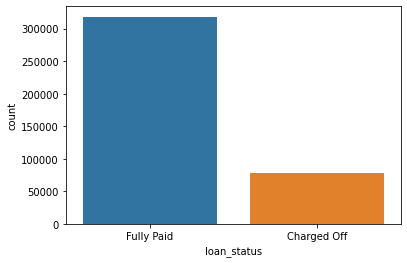

In [9]:
sns.countplot(x='loan_status',data=df)

<AxesSubplot:>

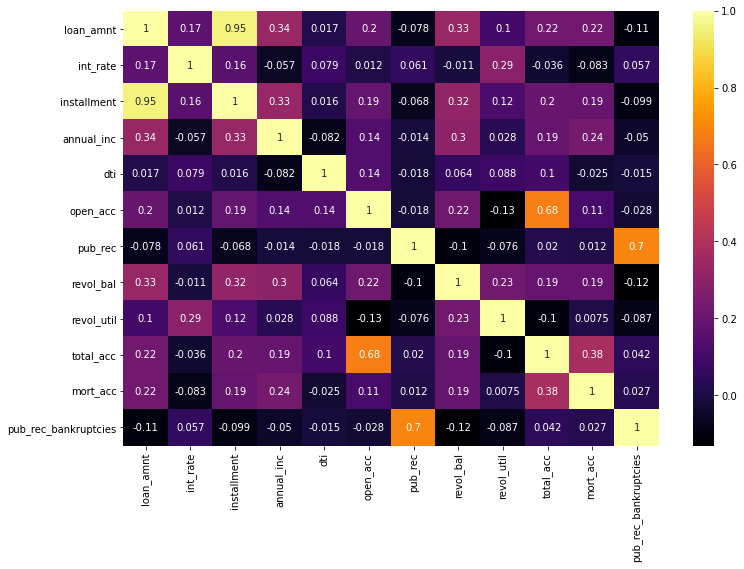

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='inferno',annot=True)

In [11]:
feat_info('pub_rec_bankruptcies')
feat_info('open_acc')

Number of public record bankruptcies
The number of open credit lines in the borrower's credit file.


In [12]:
# Looks like we have quite an inbalanced dataset, might need to consider this when splitting data for training and testing and evaluating. 
num_paid = len(df[df['loan_status']=='Fully Paid'])
num_charged = len(df[df['loan_status']=='Charged Off'])
total = len(df['loan_status'])
print ("Number of Fully Paid loans = %s (%.2f perc of total)"%(num_paid,(num_paid/total)*100))
print ("Number of Charged Off loans = %s (%.2f perc of total)"%(num_charged,(num_charged/total)*100))

Number of Fully Paid loans = 318357 (80.39 perc of total)
Number of Charged Off loans = 77673 (19.61 perc of total)


In [13]:
# Initial correlation plots to view some of the data that is most/least correlated with our label 
df_temp = df 
 # Generating a binary 0/1 column in the dataframe for the diagnosis
df_temp['bin_label'] = np.where(df['loan_status']== 'Fully Paid', 0 , 1)
high_corr = pd.DataFrame(df_temp.corr()['bin_label'].sort_values().tail(5)).transpose().columns
low_corr = pd.DataFrame(df_temp.corr()['bin_label'].sort_values().head(5)).transpose().columns


<AxesSubplot:xlabel='bin_label', ylabel='count'>

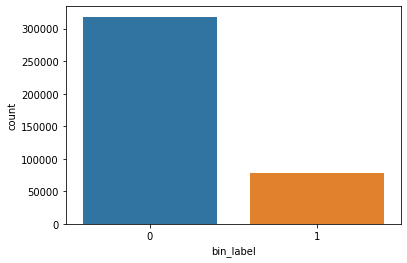

In [14]:
sns.countplot(df_temp['bin_label'])

In [15]:
df_temp.corr()['bin_label'].sort_values()

mort_acc               -0.073111
annual_inc             -0.053432
total_acc              -0.017893
revol_bal              -0.010892
pub_rec_bankruptcies    0.009383
pub_rec                 0.019933
open_acc                0.028012
installment             0.041082
loan_amnt               0.059836
dti                     0.062413
revol_util              0.082373
int_rate                0.247758
bin_label               1.000000
Name: bin_label, dtype: float64

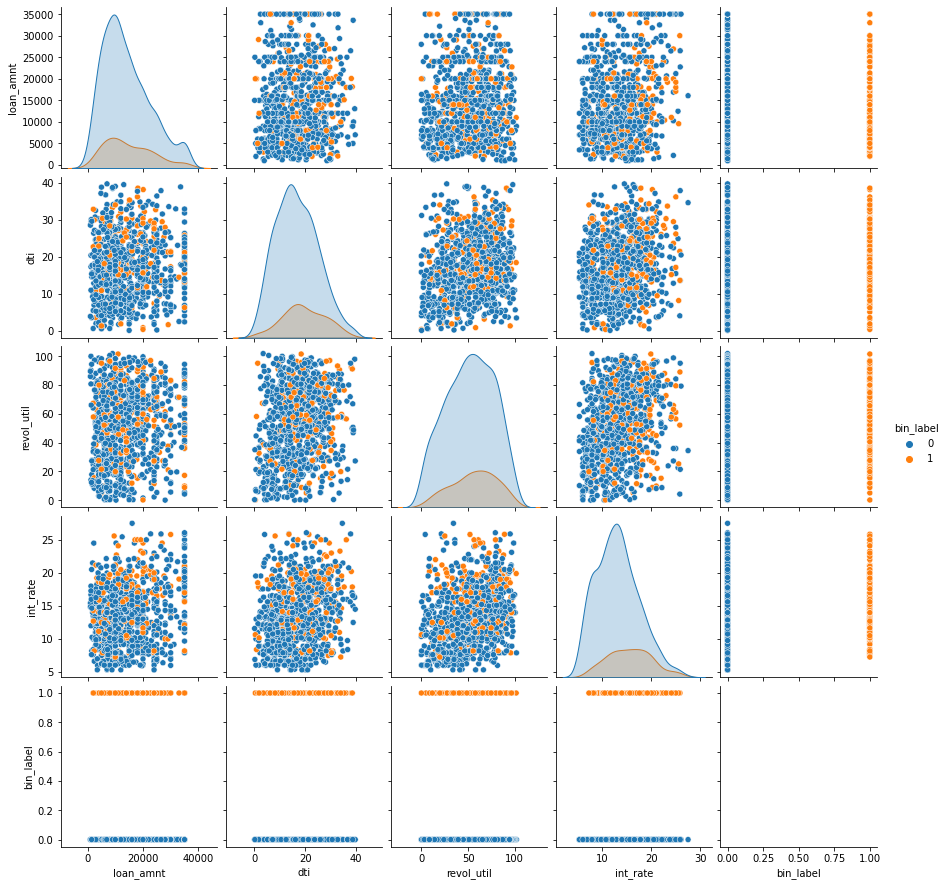

In [16]:
sns.pairplot(df_temp.sample(1000), x_vars=high_corr, y_vars=high_corr, hue='bin_label')

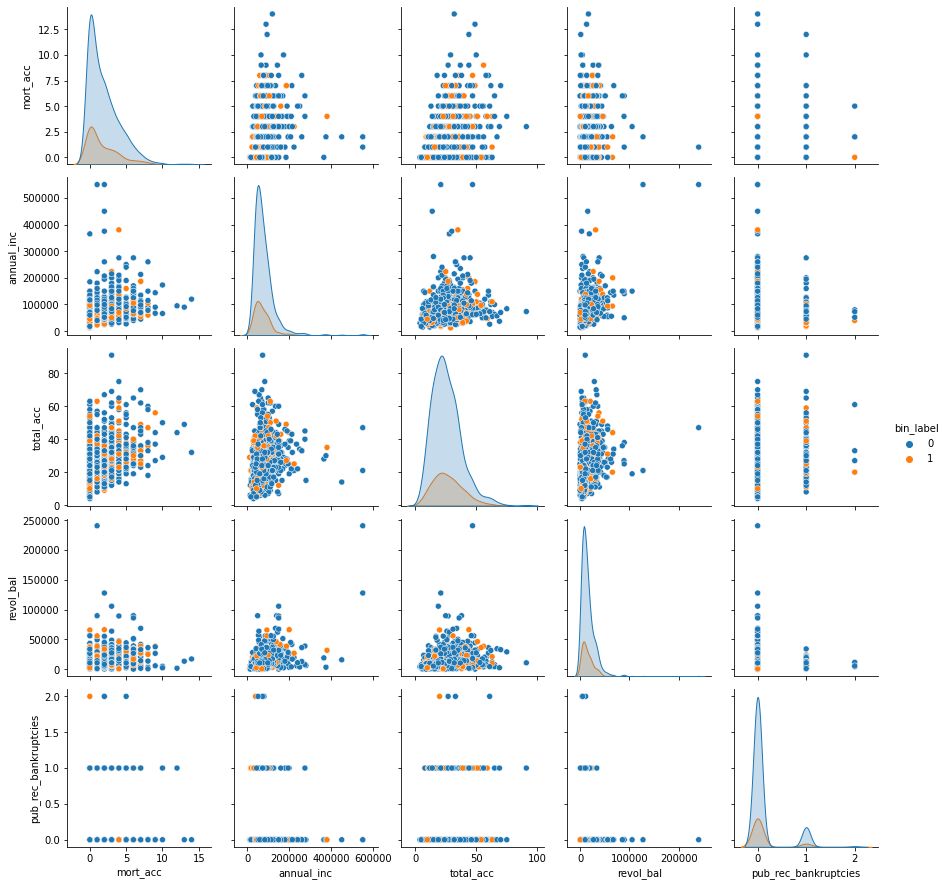

In [17]:
sns.pairplot(df_temp.sample(1000), x_vars=low_corr, y_vars=low_corr, hue='bin_label')

# What we can gather for this is that, currently, without doing any data prep on this, these plots show us that currently, the integer features in our dataset dont correllate massively strongly with the label we're trying to predict, apart from interest rate which is somewhat correllated at 0.24, but hardly. We should redo these later on after we've processed our data. 

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='loan_amnt',y='installment',data=df,hue='grade')

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

Error in callback <function flush_figures at 0x11dd887a0> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

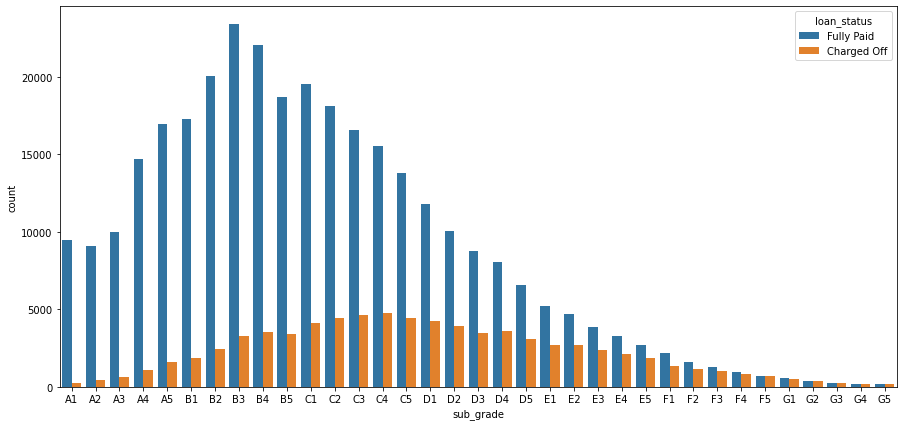

In [37]:
plt.figure(figsize=(15,7))
order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=order)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

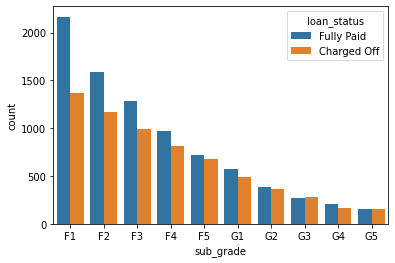

In [53]:
order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df[(df['grade']=='G') | (df['grade']=='F')],hue='loan_status',order=order[25:])